## Drawing the locale specific predictions

In each case the data is from John Hopkins and I've identified the exponential growth phase, simulated that and made predictions with physical distancing applied from that point on (i.e. we infer when physical distancing happens from the time series and test whether the subsequent curve outperforms the prediction of the model. For ealr y stage transmission (i.e. shortly after the peak) this may also provide a ball park range of how bad things will get...

Essentially it's all exponential growth followed by linear growth with an (equivalent) R_eff<1.

In [1]:
cd("/Users/michael/work/GitHub/epinets")

In [2]:
include("EpiSim.jl")

Main.EpiSim

In [3]:
using CSV
using Plots
using LightGraphs
using JLD2, FileIO

In [4]:
cd("/Users/michael/work/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series")

# Australian States

In [5]:
file="time_series_covid19_confirmed_global.csv"
allstates=["Australian Capital Territory" "New South Wales"  "Northern Territory" "Queensland" "South Australia" "Tasmania" "Victoria" "Western Australia"]

1×8 Array{String,2}:
 "Australian Capital Territory"  …  "Victoria"  "Western Australia"

In [6]:
z=[]
for state in allstates
    z=push!(z,EpiSim.getdata("Australia",state))
end

In [7]:
ddays=CSV.File(file)[1]
ddays=propertynames(ddays,4)[5:end]
ddays=String.(ddays)
ndays=length(ddays)

99

In [8]:
pops=[426709 8089526 245869 5095100 1751693 534281 6594804 2621680]

1×8 Array{Int64,2}:
 426709  8089526  245869  5095100  1751693  534281  6594804  2621680

In [9]:
#'reasonable' parameters
epiparam=Dict()
epiparam["p0"]=0.2 #a guess - tuned to match observed data 
epiparam["p2"]=1/12 #revised infection rate with distancing measure
epiparam["q"]=1/7 #"up to" two weeks
epiparam["r0"]=1/14 #about two weeks for mild, 3-6 for severe
epiparam["r2"]=1/4 #revised removal rate (now due to testing and isolation)
epiparam["nseeds"]=5 #probably too many, consider dropping.

5

In [10]:
#plotly()
gr()

Plots.GRBackend()

In [11]:
cd("/Users/michael/work/GitHub/epinets")
@load "done_AU"
cd("/Users/michael/work/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series")
z=[]
for state in allstates
    z=push!(z,EpiSim.getdata("Australia",state))
end

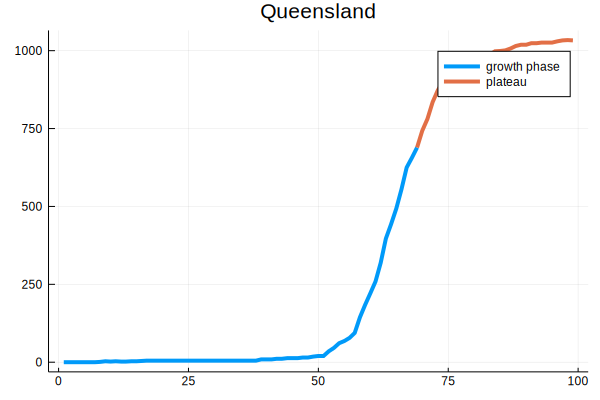

In [12]:
i=4
pop=Int(floor(sqrt(pops[i])))^2
y=z[i];
ddt(z,zt)=count(z->z>0, z[1:zt])+ count(z->z<0, z[zt+1:end])
~,tpday=findmax([ddt(diff(diff(y)),nx) for nx in 1:(ndays-2)])
#this is the turning point between exponential growth and decay. totItp total infections at day tpday
totItp=y[tpday+1]
plot(1:tpday+1,y[1:tpday+1],lw=4,label="growth phase",title=allstates[i])
plot!(tpday+1:ndays,y[tpday+1:ndays],lw=4,label="plateau")

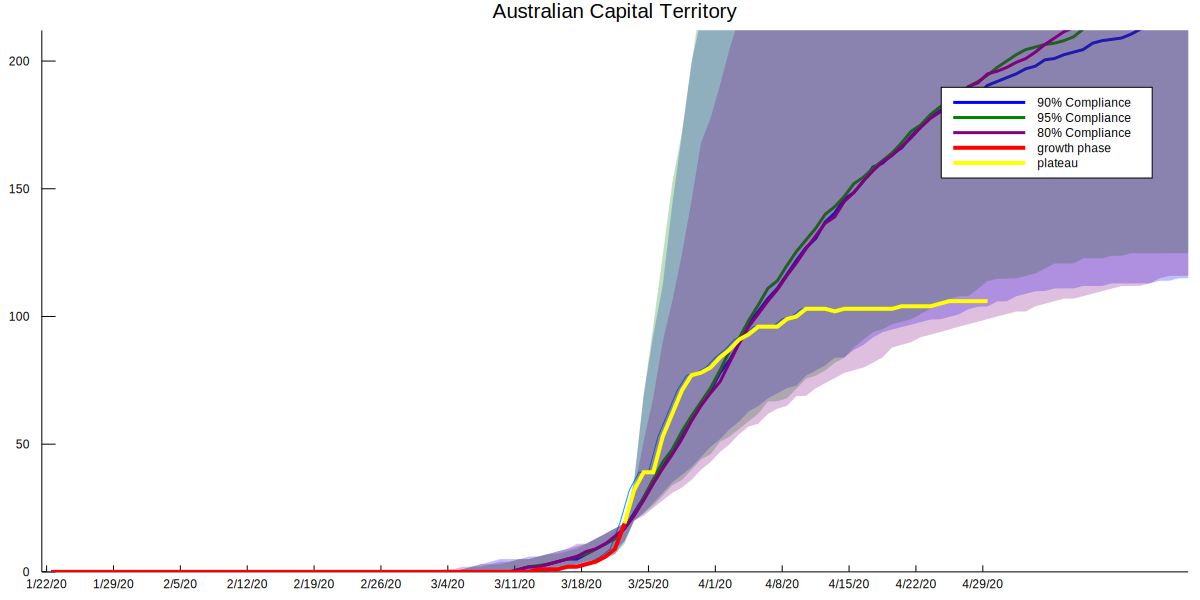

In [13]:
i=1
pop=Int(floor(sqrt(pops[i])))^2
y=z[i];
statename=allstates[i]
plot(ddays,y,size=(1200,600),label=false)
EpiSim.plotquantiles(pop .- (allrs[statename][1,2]+allrs[statename][1,1]),:blue,"90% Compliance")
EpiSim.plotquantiles(pop .- (allrs[statename][2,2]+allrs[statename][2,1]),:green,"95% Compliance")
EpiSim.plotquantiles(pop .- (allrs[statename][3,2]+allrs[statename][3,1]),:purple,"80% Compliance")
plot!(1:tpdays[statename]+1,y[1:tpdays[statename]+1],lw=4, color=:red,label="growth phase",title=allstates[i])
plot!(tpdays[statename]+1:ndays,y[tpdays[statename]+1:ndays],color=:yellow,lw=4,label="plateau",xlim=(0, 120), ylim=(0,2*y[end]))

In [14]:
plt=Array{Any,1}(undef,length(allstates))
for i in 1:length(allstates)
    pop=Int(floor(sqrt(pops[i])))^2
    y=z[i];
    statename=allstates[i]
    plt[i]=plot(ddays,y,size=(1200,600),label=false)
    EpiSim.plotquantiles(pop .- (allrs[statename][1,2]+allrs[statename][1,1]),:blue)
    EpiSim.plotquantiles(pop .- (allrs[statename][2,2]+allrs[statename][2,1]),:green)
    EpiSim.plotquantiles(pop .- (allrs[statename][3,2]+allrs[statename][3,1]),:purple)
    plot!(1:tpdays[statename]+1,y[1:tpdays[statename]+1],lw=4, color=:red,label=false,title=allstates[i])
    plot!(tpdays[statename]+1:ndays,y[tpdays[statename]+1:ndays],color=:yellow,lw=4,label=false,xlim=(0, 120), ylim=(0,2*y[end]))
end

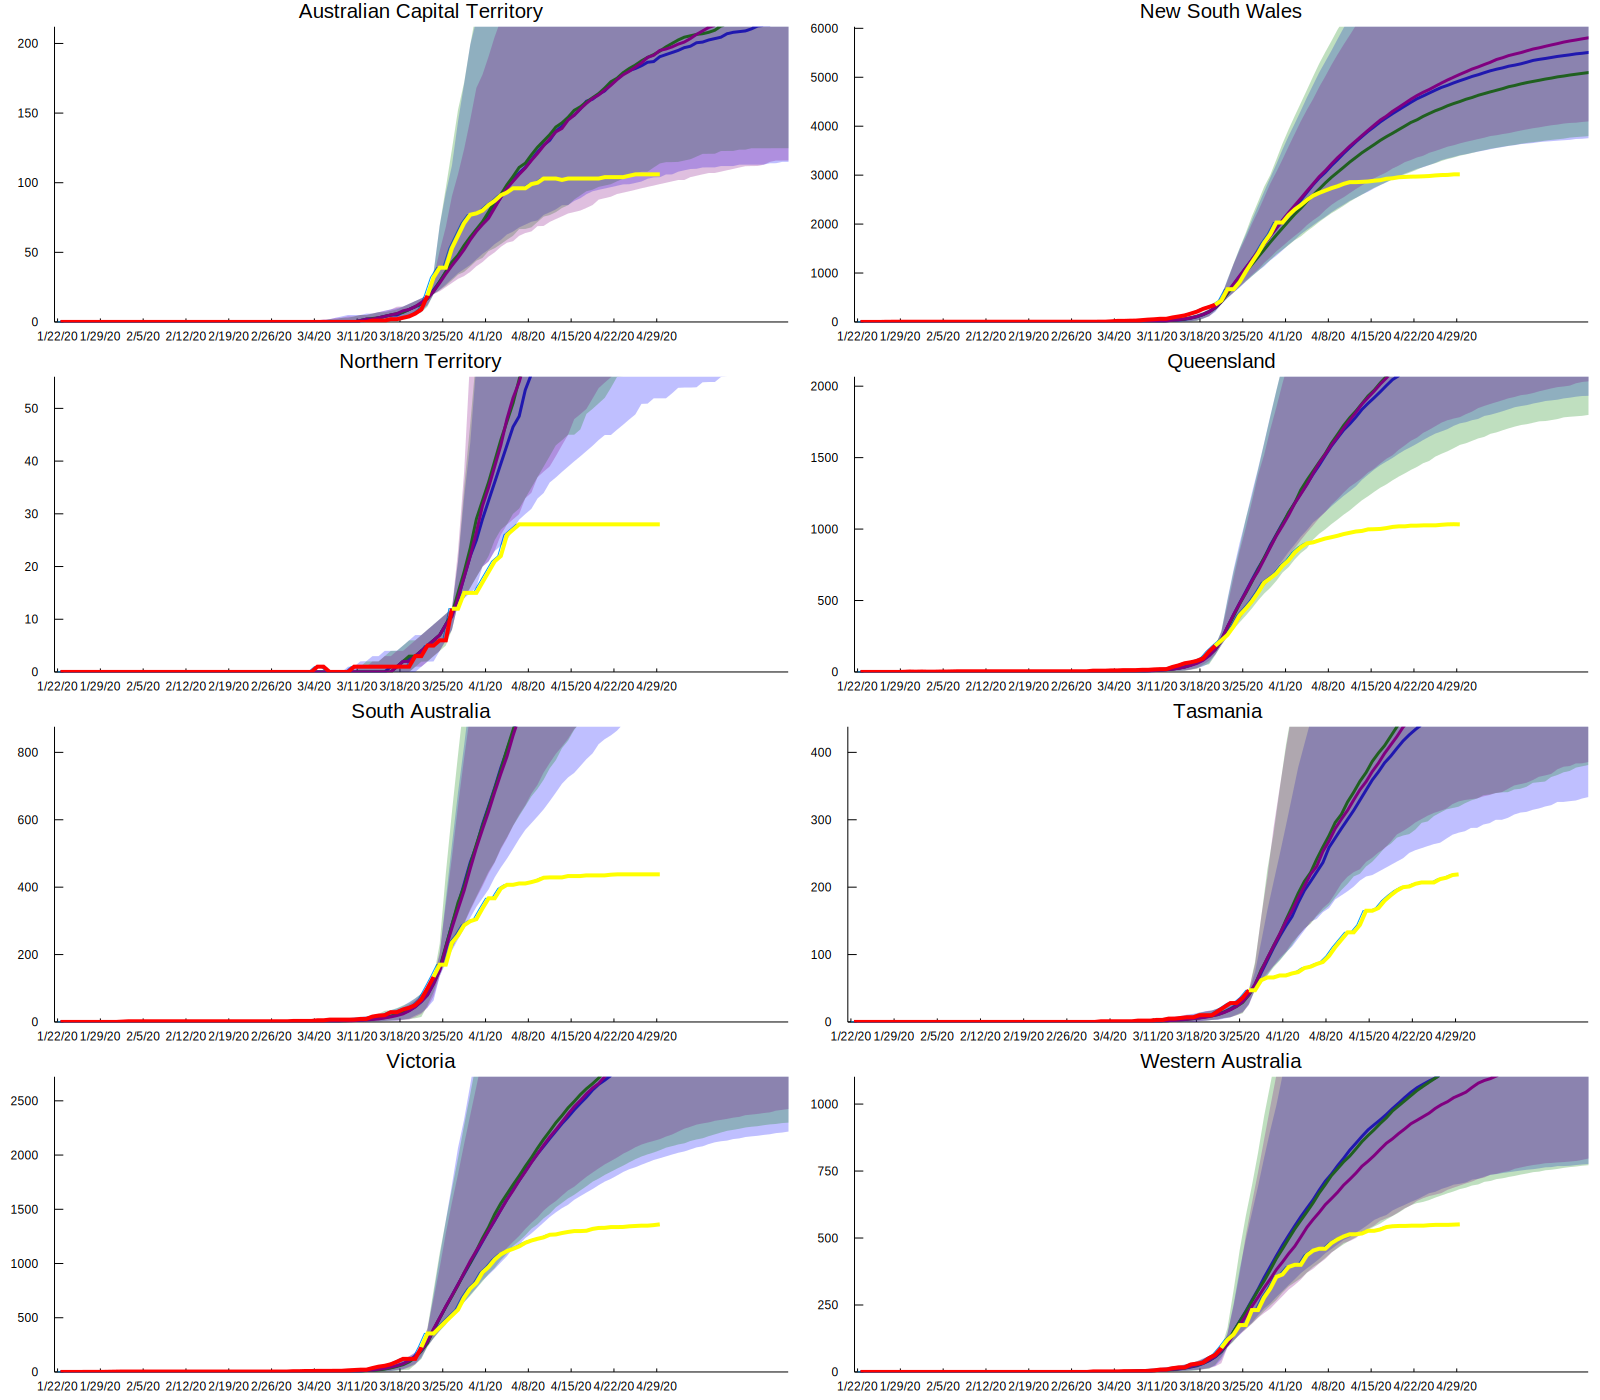

In [15]:
plot(plt[1],plt[2],plt[3],plt[4],plt[5],plt[6],plt[7],plt[8],layout=(4,2),size=(1600,1400))

In [16]:
savefig("AllStates")

# (random bits of) The Rest of the World

In [17]:
plotly()

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /Users/michael/.julia/packages/Plots/cc8wh/src/backends.jl:363


Plots.PlotlyBackend()

In [25]:
cd("/Users/michael/work/GitHub/epinets")
pops=[7451000 5639000 5518000 5806000 24280000 21540000 60360000 80300000]
allstates=["Hong Kong" "" "" "" "Shanghai" "Beijing" "" "" ]
countries=["China" "Singapore" "Finland" "Denmark" "China" "China"]
@load "done_ROTW_mostly"
cd("/Users/michael/work/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series")
z=[]
for (i,state) in enumerate(allstates)
    z=push!(z,EpiSim.getdata(countries[i],state))
end

In [26]:
usename=["Hong Kong" "Singapore" "Finland" "Denmark" "Shanghai" "Beijing"]
plt=Array{Any,1}(undef,6)
for i in 1:length(usename)
    pop=Int(floor(sqrt(pops[i])))^2
    y=z[i];
    statename=allstates[i]
    plt[i]=plot(ddays,y,size=(1200,600),label=false)
    EpiSim.plotquantiles(pop .- (allrs[allstates[i]][1,2]+allrs[allstates[i]][1,1]),:blue)
    EpiSim.plotquantiles(pop .- (allrs[allstates[i]][2,2]+allrs[allstates[i]][2,1]),:green)
    EpiSim.plotquantiles(pop .- (allrs[allstates[i]][3,2]+allrs[allstates[i]][3,1]),:purple)
    plot!(1:tpdays[allstates[i]]+1,y[1:tpdays[allstates[i]]+1],lw=4, color=:red,label=false,title=usename[i])
    plot!(tpdays[allstates[i]]+1:ndays,y[tpdays[allstates[i]]+1:ndays],color=:yellow,lw=4,label=false,xlim=(0, 120), ylim=(0,2*y[end]))
end

In [27]:
plot(plt[1],plt[2],plt[3],plt[4],plt[5],plt[6],layout=(3,2),size=(1600,1400))

<!DOCTYPE html>
 
 
 Plots.jl

## USA

In [29]:
cd("/Users/michael/work/GitHub/epinets")
@load "done_US"
cd("/Users/michael/work/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series")
z=[]
for (i,state) in enumerate(usstates)
    z=push!(z,EpiSim.getdataus(uslocale[i],state))
end

In [30]:
plt=Array{Any,1}(undef,length(usstates))
pops=[8398748 3990000 1749343 5150233 943332 1584064 391006 2716940]
for i in 1:length(usstates)
#    pop=Int(floor(sqrt(pops[i])))^2
    y=z[i];
    locale=uslocale[i]
    pop = Int(allrs[locale][1,1][1,1])
    plt[i]=plot(ddays,y,size=(1200,600),label=false)
    EpiSim.plotquantiles(pop .- (allrs[locale][1,2]+allrs[locale][1,1]),:blue)
    EpiSim.plotquantiles(pop .- (allrs[locale][2,2]+allrs[locale][2,1]),:green)
    EpiSim.plotquantiles(pop .- (allrs[locale][3,2]+allrs[locale][3,1]),:purple)
    plot!(1:tpdays[locale]+1,y[1:tpdays[locale]+1],lw=4, color=:red,label=false,title=locale)
    plot!(tpdays[locale]+1:ndays,y[tpdays[locale]+1:ndays],color=:yellow,lw=4,label=false,xlim=(0, 120), ylim=(0,2*y[end]))
end

In [31]:
plot(plt[1],plt[2],plt[3],plt[4],plt[5],plt[6],plt[7],plt[8],layout=(4,2),size=(1600,1400))

<!DOCTYPE html>
 
 
 Plots.jl

## So what's gone wrong here?

Clearly these predictions aren't as "nice" as for the Australian data. First observation is that the model is imple and relies on a single change point and the assumption that there is limited cross infection between regions. There is very little evidence that either of these assumptions are remotely reasonable elsewhere, especially in the US. Second, the change-points, switching between exponential growth and linear (controlled) expansion has not been well manaegd. In all cases here it should've been identified much earlier. Using a different criteria to identify the exponential growth will almost certainly (probably) give better results.